In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-05-23 14:52:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   100KB/s    in 0,7s    

2024-05-23 14:53:01 (100 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("FuelConsumption.csv")

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Display all columns to understand what columns are available
print(df.columns)

# Define the target variable
target_var = 'CO2EMISSIONS'

# Drop irrelevant columns
df_new = df.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis=1)

#Shuffle the dataset
data = df_new.sample(frac=1, random_state=42)

# Split the data into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.15, random_state=42)

# Separate features and target variable for both training and testing sets
X_trainset = train_set.drop(columns=target_var)
Y_trainset = train_set[target_var]
X_testset = test_set.drop(columns=target_var)
Y_testset = test_set[target_var]

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [5]:
# Initialize and configure the RandomForestRegressor model
model = RandomForestRegressor(oob_score=True, random_state=42)

# Define the hyperparameters for grid search
parameters = {
    'n_estimators': range(150, 601, 50),
    'max_features': ["auto"],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

# Initialize GridSearchCV with the RandomForest model and the defined parameters
clf = GridSearchCV(model, parameters, cv=10, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model to the training set
clf.fit(X_trainset, Y_trainset)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/hossein/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default va

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': ['auto'], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': range(150, 601, 50)},
             scoring='neg_mean_squared_error', verbose=2)

Best parameters found:  {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}
R^2 Training Score: 0.99
R^2 Validation Score: 0.97
OOB Score: 0.96


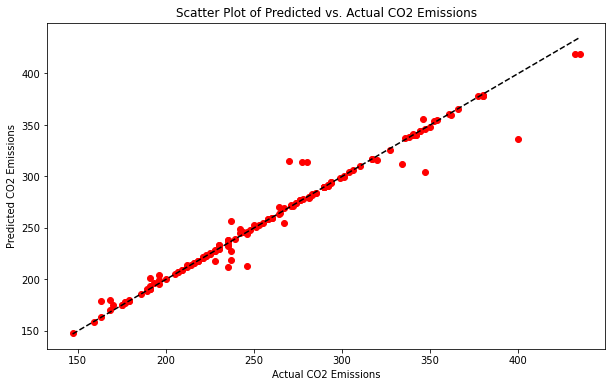

In [6]:
# Print the best parameters found by GridSearchCV
print("Best parameters found: ", clf.best_params_)

# Retrieve the best model from the grid search
model = clf.best_estimator_

# Evaluate the model using the training and test sets
print("R^2 Training Score: {:.2f}".format(model.score(X_trainset, Y_trainset)))
print("R^2 Validation Score: {:.2f}".format(model.score(X_testset, Y_testset)))
print("OOB Score: {:.2f}".format(model.oob_score_))

# Predict the CO2 emissions on the test set
y_pred = model.predict(X_testset)

# Plot the true values vs the predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_testset, y_pred, 'ro')
plt.plot([Y_testset.min(), Y_testset.max()], [Y_testset.min(), Y_testset.max()], 'k--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Scatter Plot of Predicted vs. Actual CO2 Emissions')
plt.savefig('prediction_accuracy.png', dpi=300)  # Save the plot with a high resolution
plt.show()

In [8]:
# Explain the model's predictions using SHAP values
explainer = shap.Explainer(model, X_trainset)
shap_values = explainer.shap_values(X_trainset)

# Plot the SHAP values for the training set
shap.summary_plot(shap_values, X_trainset, show=False)
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()

# Additional SHAP plot (violin plot)
shap.summary_plot(shap_values, X_trainset, plot_type="violin", show=False)
plt.savefig('shap_violin_plot.png', dpi=300, bbox_inches='tight')
plt.close()

 47%|=========           | 424/906 [00:13<00:14]       

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=350; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=450; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=550; total time=   3.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=2

 50%|==========          | 457/906 [00:14<00:13]       

 time=   1.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=250; total time=   1.3s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   2.4s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=450; total time=   2.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   3.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=550; total time=   3.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.8s
[CV] END max_features=auto, min_

 54%|===========         | 489/906 [00:15<00:12]       

samples_leaf=3, min_samples_split=3, n_estimators=200; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=250; total time=   1.4s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=350; total time=   1.9s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=400; total time=   2.0s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=450; total time=   2.7s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   2.6s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=550; total time=   3.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

 67%|=============       | 611/906 [00:19<00:09]       

n_samples_split=3, n_estimators=150; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=350; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   2.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=450; total time=   2.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   2.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=550; total time=   3.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=250; total tim

 73%|===============     | 658/906 [00:21<00:07]       

, min_samples_split=3, n_estimators=200; total time=   1.3s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=   1.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   1.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=350; total time=   2.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=450; total time=   3.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   2.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=550; total time=   3.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   2.9s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total

 75%|===============     | 684/906 [00:22<00:07]       

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=350; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=450; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=550; total time=   3.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.7s
[CV] END max_features=auto, min_samples_leaf=2

 81%|================    | 732/906 [00:24<00:05]       

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=450; total time=   1.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=550; total time=   3.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END max_features=auto, min_samples_leaf=2

 86%|=================   | 780/906 [00:26<00:04]       

[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=250; total time=   0.6s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=350; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=450; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=550; total time=   3.0s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   3.6s
[CV] END max_features=auto, min_samples_leaf=2

 92%|==================  | 832/906 [00:28<00:02]       

, min_samples_split=3, n_estimators=150; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   1.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=250; total time=   1.5s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   1.9s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=350; total time=   1.9s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=400; total time=   2.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=500; total time=   2.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=550; total time=   3.3s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=600; total time=   3.1s
[CV] END max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total

 97%|=================== | 881/906 [00:30<00:00]       